conda install -c conda-forge python-utils

random-state=200 dans sickit-learn pour fit va fixer nos resultats.

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Clustering avec scikit-learn

<br><br></p>

dans ce notebook, nous allons appliquer k-means en utilisant scikit-learn. 

Nous allons utiliser l'analyse de clusters pour avoir une vue d'ensemble concernant la méteo dans une station.

Dans ce dataset, nous avons des milliers d'enregistrements. comment peut-on en créer 12 clusters?



<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import python_utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Créer un Pandas DataFrame à partir du fichier CSV en question<br><br></p>


In [3]:
data = pd.read_csv('./weather/minute_weather.csv')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">"Minute Weather Data"</p>
<br>


Chaque ligne dans **minute_weather.csv** contient des données méteorologiques en une minute, les variables sont:


* **rowID:** 	unique number for each row	(*Unit: NA*)
* **hpwren_timestamp:**	timestamp of measure	(*Unit: year-month-day hour:minute:second*)
* **air_pressure:** air pressure measured at the timestamp	(*Unit: hectopascals*)
* **air_temp:**	air temperature measure at the timestamp	(*Unit: degrees Fahrenheit*)
* **avg_wind_direction:**	wind direction averaged over the minute before the timestamp	(*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **avg_wind_speed:**	wind speed averaged over the minute before the timestamp	(*Unit: meters per second*)
* **max_wind_direction:**	highest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed:**	highest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **min_wind_direction:**	smallest wind direction in the minute before the timestamp	(*Unit: degrees, with 0 being North and inceasing clockwise*)
* **min_wind_speed:**	smallest wind speed in the minute before the timestamp	(*Unit: meters per second*)
* **rain_accumulation:**	amount of accumulated rain measured at the timestamp	(*Unit: millimeters*)
* **rain_duration:**	length of time rain has fallen as measured at the timestamp	(*Unit: seconds*)
* **relative_humidity:**	relative humidity measured at the timestamp	(*Unit: percent*)

In [4]:
data.shape

(1587257, 13)

In [5]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

échatillonnage de données<br></p>

Plusieurs ligne, nous allons prendre chaque 10ième élément 
 <br>


In [6]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Statistiques 
<br><br></p>


In [7]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [8]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [9]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

supprimer  rain_duration et rain_accumulation
<br><br></p>


In [10]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [11]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

combien de lignes supprimées ?
<br><br></p>


In [12]:
rows_before - rows_after

46

In [16]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

 Features qui nous intéressent pour le Clustering
<br><br></p>


In [17]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [18]:
select_df = sampled_df[features]

In [19]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [20]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
60,912.0,64.04,83.0,0.7,101.0,0.9,51.4
70,911.9,64.22,82.0,2.0,97.0,2.4,62.2
80,911.9,61.70,67.0,3.3,70.0,3.5,71.5
90,911.9,61.34,67.0,3.6,75.0,4.2,72.5


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

metter à l'echelle les Features (caractéristiuques) en utilisant StandardScaler
<br><br></p>


In [22]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Utiliser k-Means Clustering
<br><br></p>


In [29]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=89, tol=0.0001, verbose=0)


**Ajoutez le paramètre random_state, qu'est ce que vous osbservez ?**

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

les centroides des 12 clusters formés  ?
<br><br></p>


In [31]:
centers = model.cluster_centers_
centers

array([[-0.83975946, -1.19886028,  0.37519108,  0.36047832,  0.47351689,
         0.34852918,  1.36175966],
       [ 0.13260307,  0.84409639,  1.41071601, -0.63863579,  1.67475786,
        -0.58934083, -0.71418953],
       [-1.18120169, -0.87429246,  0.44697635,  1.97971426,  0.53880996,
         1.94097864,  0.91231634],
       [ 1.36746942, -0.08180255, -1.20726888, -0.04806476, -1.07621861,
        -0.02771725, -0.97747632],
       [ 1.19057401, -0.25522069, -1.15497259,  2.1248264 , -1.05348098,
         2.24173171, -1.13466563],
       [ 0.24737672, -0.99434819,  0.65898733, -0.54739738,  0.85010733,
        -0.53010795,  1.16020147],
       [-0.6906401 ,  0.5519542 ,  0.17927558, -0.58458793,  0.34908892,
        -0.59797627, -0.11924938],
       [-0.21251243,  0.63113549,  0.40847277,  0.73592499,  0.51654339,
         0.67376289, -0.14966829],
       [ 0.05827029, -0.78686628, -1.19603792, -0.57109581, -1.04193927,
        -0.58563345,  0.87704715],
       [ 0.2335848 ,  0.3190

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Ploting
<br><br></p>


Let us first create some utility functions which will help us in plotting graphs:

In [33]:
# source: python for data science 
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [34]:
# Function that creates Parallel Plots
## islice('ABCDEFG', 2) --> A B
    # islice('ABCDEFG', 2, 4) --> C D
    # islice('ABCDEFG', 2, None) --> C D E F G
    # islice('ABCDEFG', 0, None, 2) --> A C E G

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [35]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.839759,-1.198860,0.375191,0.360478,0.473517,0.348529,1.361760,0
1,0.132603,0.844096,1.410716,-0.638636,1.674758,-0.589341,-0.714190,1
2,-1.181202,-0.874292,0.446976,1.979714,0.538810,1.940979,0.912316,2
3,1.367469,-0.081803,-1.207269,-0.048065,-1.076219,-0.027717,-0.977476,3
4,1.190574,-0.255221,-1.154973,2.124826,-1.053481,2.241732,-1.134666,4
5,0.247377,-0.994348,0.658987,-0.547397,0.850107,-0.530108,1.160201,5
6,-0.690640,0.551954,0.179276,-0.584588,0.349089,-0.597976,-0.119249,6
7,-0.212512,0.631135,0.408473,0.735925,0.516543,0.673763,-0.149668,7
8,0.058270,-0.786866,-1.196038,-0.571096,-1.041939,-0.585633,0.877047,8
9,0.233585,0.319087,1.887854,-0.651989,-1.551707,-0.576833,-0.282716,9


# jours secs

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


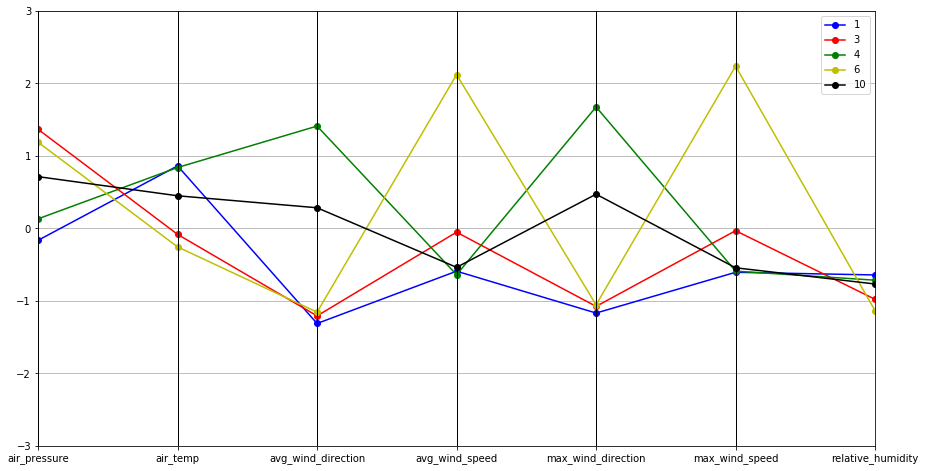

In [40]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# jours chauds 

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


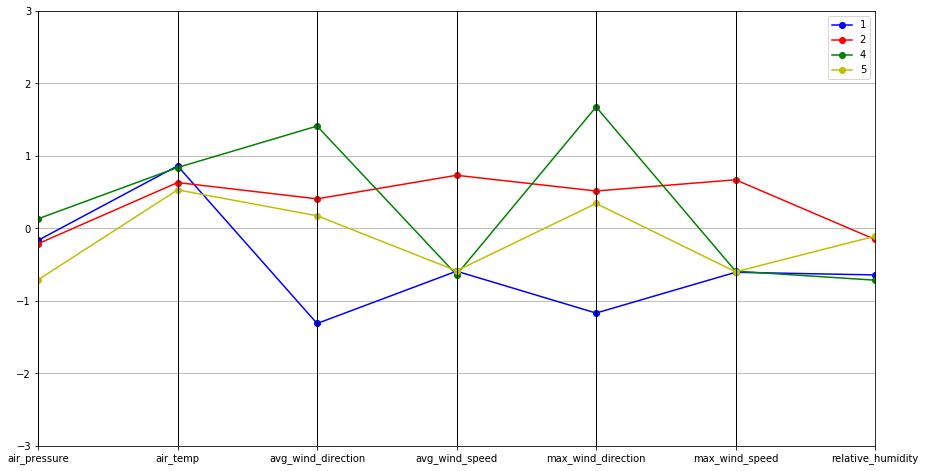

In [41]:
parallel_plot(P[P['air_temp'] > 0.5])

# journées fraiches 

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


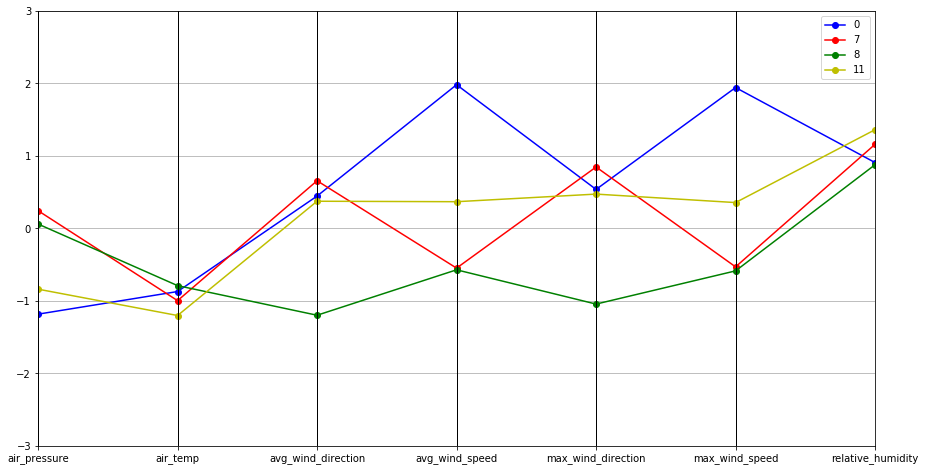

In [42]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])
